In [37]:
import pandas as pd
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

In [4]:
df = pd.read_csv(r"C:\Users\saad1\Documents\Python_Time_Series\Time_Series_Files\Time Series Analysis\Exponential Smoothing and Holt Winters\weekly_customer_complaints.csv", index_col='week', parse_dates=True)

In [5]:
df.head()

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,"1,750",37.26%,1,0,0
2018-01-08,"1,701",35.38%,0,0,0
2018-01-15,"1,711",36.22%,1,0,0
2018-01-22,"1,443",38.33%,1,0,0
2018-01-29,"1,397",36.34%,0,0,0


In [6]:
df.rename(columns={'complaints':'y'},inplace=True)

In [7]:
df.head()

,y,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,"1,750",37.26%,1,0,0
2018-01-08,"1,701",35.38%,0,0,0
2018-01-15,"1,711",36.22%,1,0,0
2018-01-22,"1,443",38.33%,1,0,0
2018-01-29,"1,397",36.34%,0,0,0


In [13]:
df['y'] = df['y'].str.replace(',','').astype(int)

In [14]:
df.head()

,y,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,1750,37.26%,1,0,0
2018-01-08,1701,35.38%,0,0,0
2018-01-15,1711,36.22%,1,0,0
2018-01-22,1443,38.33%,1,0,0
2018-01-29,1397,36.34%,0,0,0


In [18]:
df.shape

(261, 5)

In [19]:
df.tail()

,y,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2022-11-28,4444,29.89%,0,1,0
2022-12-05,4920,28.48%,1,0,0
2022-12-12,5342,28.89%,0,0,0
2022-12-19,3868,33.26%,0,0,0
2022-12-26,3607,37.35%,0,1,0


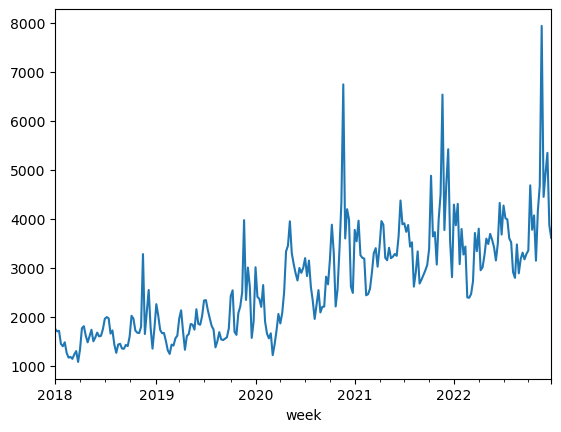

In [17]:
df['y'].plot()
plt.show()


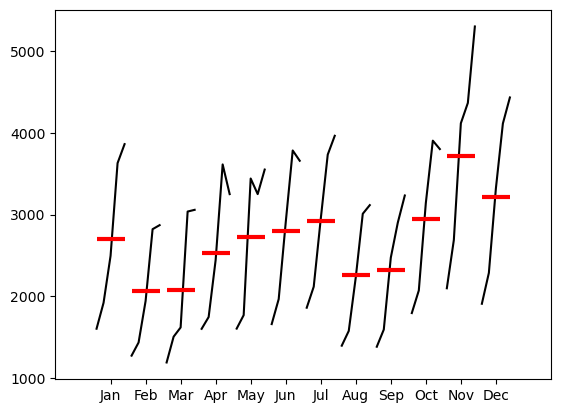

In [21]:
month_plot(df['y'].resample('ME').mean())
plt.show()

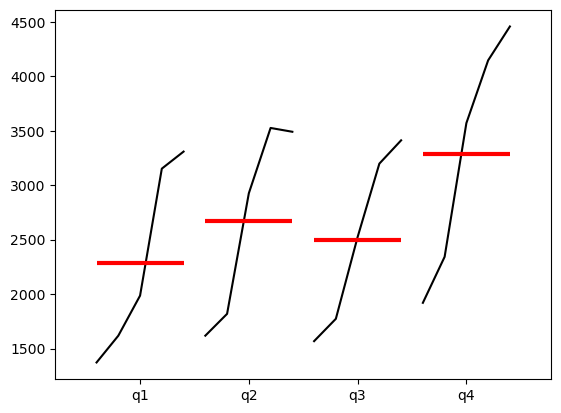

In [22]:
quarter_plot(df['y'].resample('QE').mean())
plt.show()

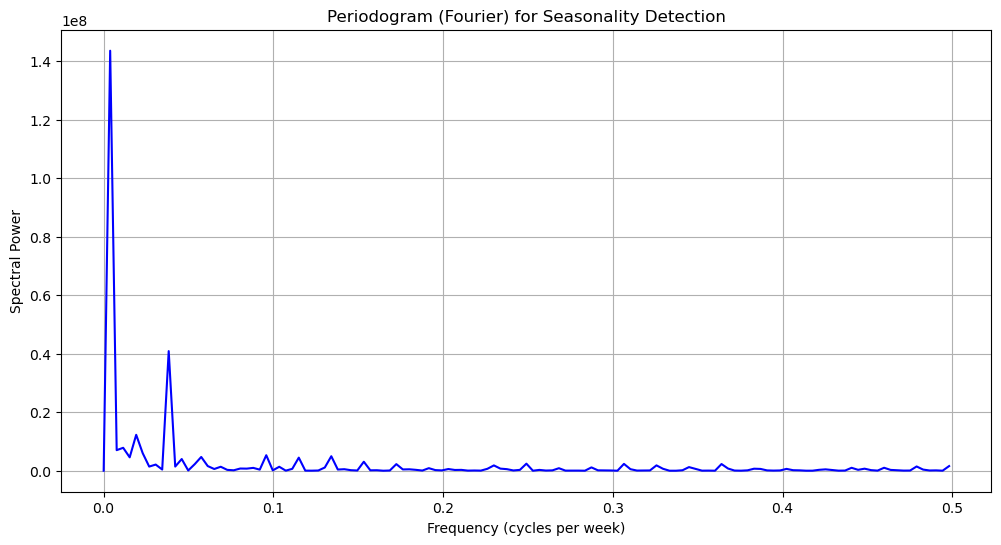

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import periodogram

# Suppose df['value'] is your weekly data
# Sampling frequency is 1 observation per week
freqs, power = periodogram(df['y'], fs=1)  # fs=1 means 1 observation per week

# Plot Periodogram
plt.figure(figsize=(12,6))
plt.plot(freqs, power, 'b-')
plt.title('Periodogram (Fourier) for Seasonality Detection')
plt.xlabel('Frequency (cycles per week)')
plt.ylabel('Spectral Power')
plt.grid(True)
plt.show()


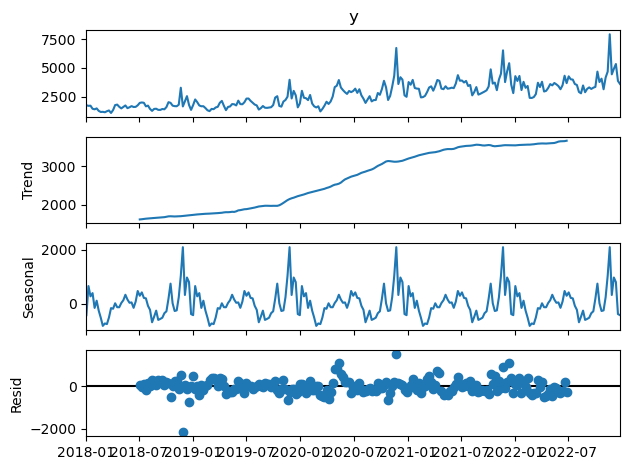

In [27]:
seasonal_decompose(df['y'], model = 'additive' , period=52).plot()
plt.show()

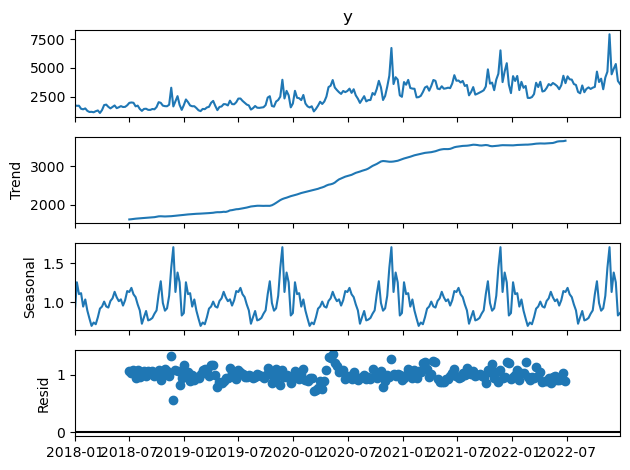

In [28]:
seasonal_decompose(df['y'], model = 'multiplicative' , period=52).plot()
plt.show()

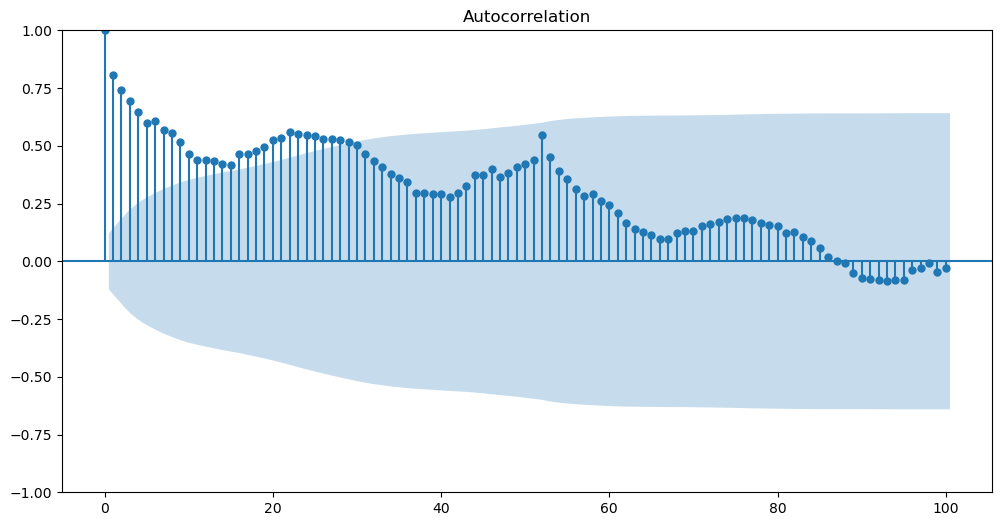

In [29]:
fig, ax = plt.subplots(figsize=(12,6))
plot_acf(df['y'], lags=100, ax=ax)
plt.show()

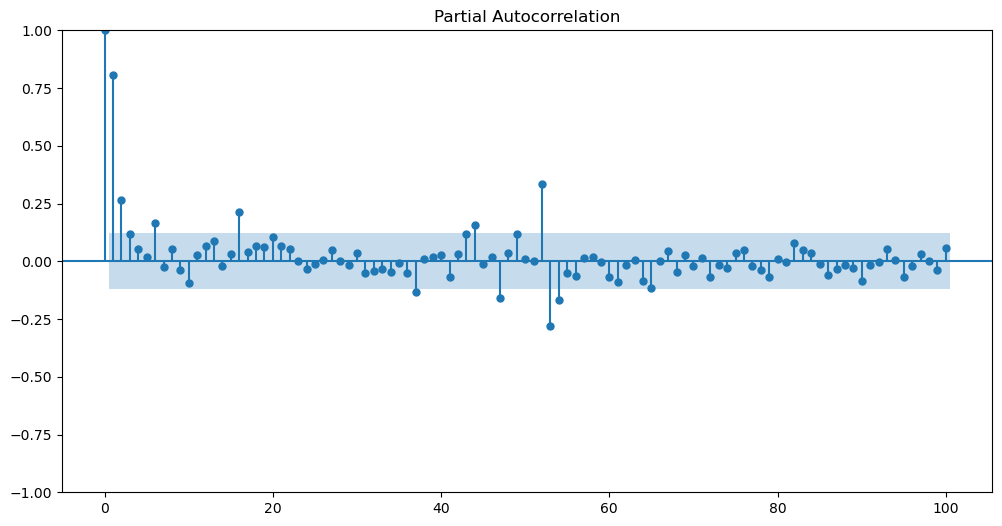

In [30]:
fig, ax = plt.subplots(figsize=(12,6))
plot_pacf(df['y'], lags=100, ax=ax)
plt.show()

In [31]:
df = df.asfreq('W-Mon')

In [32]:
df.index

DatetimeIndex(['2018-01-01', '2018-01-08', '2018-01-15', '2018-01-22',
               '2018-01-29', '2018-02-05', '2018-02-12', '2018-02-19',
               '2018-02-26', '2018-03-05',
               ...
               '2022-10-24', '2022-10-31', '2022-11-07', '2022-11-14',
               '2022-11-21', '2022-11-28', '2022-12-05', '2022-12-12',
               '2022-12-19', '2022-12-26'],
              dtype='datetime64[ns]', name='week', length=261, freq='W-MON')

In [35]:
periods = 13
train = df[:-periods].y
test = df[-periods:].y


In [36]:
train

week
2018-01-01    1750
2018-01-08    1701
2018-01-15    1711
2018-01-22    1443
2018-01-29    1397
              ... 
2022-08-29    2885
2022-09-05    3177
2022-09-12    3306
2022-09-19    3170
2022-09-26    3279
Freq: W-MON, Name: y, Length: 248, dtype: int32

In [42]:
ses_model = SimpleExpSmoothing(train).fit()
ses_model.summary()

Dep. Variable:,y,No. Observations:,248
Model:,SimpleExpSmoothing,SSE,74355478.081
Optimized:,True,AIC,3131.513
Trend:,None,BIC,3138.540
Seasonal:,None,AICC,3131.678
Seasonal Periods:,None,Date:,"Sat, 12 Apr 2025"
Box-Cox:,False,Time:,22:54:55
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5097818,alpha,True
initial_level,1750.0000,l.0,False


In [41]:
train

week
2018-01-01    1750
2018-01-08    1701
2018-01-15    1711
2018-01-22    1443
2018-01-29    1397
              ... 
2022-08-29    2885
2022-09-05    3177
2022-09-12    3306
2022-09-19    3170
2022-09-26    3279
Freq: W-MON, Name: y, Length: 248, dtype: int32

In [44]:
ses_fct = ses_model.forecast(periods)
ses_fct

2022-10-03    3236.663468
2022-10-10    3236.663468
2022-10-17    3236.663468
2022-10-24    3236.663468
2022-10-31    3236.663468
2022-11-07    3236.663468
2022-11-14    3236.663468
2022-11-21    3236.663468
2022-11-28    3236.663468
2022-12-05    3236.663468
2022-12-12    3236.663468
2022-12-19    3236.663468
2022-12-26    3236.663468
Freq: W-MON, dtype: float64

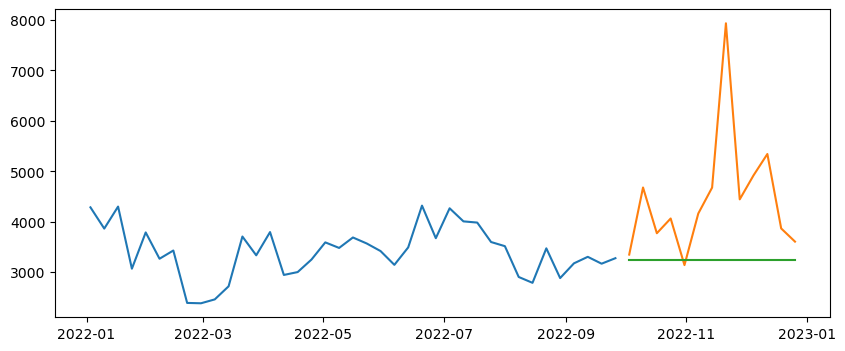